In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name=fm.FontProperties(fname='C:\\Windows\\Fonts\\malgun.ttf').get_name()
plt.rc('font',family=font_name)

import matplotlib as mlp
mlp.rcParams['axes.unicode_minus']=False

# Midproject
주제 : 포스트 코로나의 ott 서비스의 이용 행태 및 이용률 변화
- ott 서비스 개괄적 소개
- 영화관, tv 외 기타 매채(스마트폰/태블릿 등등) 이용 빈도 변화 이용률 현황 
- ott 와 비교
- 결과 도출

# 1. 가장 많이 이용하는 OTT 서비스 1순위(2020~2021)
### ※ 이야기 해야 할 것 

#####    1) 0.5이하의 비중이 없는 변수들을 "기타" 파생변수를 만들어서 하나의 변수로 처리
    
#####    2) 컬럼으로는 성별, 연령, 월평균소득, 지역, 가구원수 사용 

In [5]:
best_ott=pd.read_csv("data/가장_많이_이용하는_OTT_서비스_1순위.csv",header=[0,1], index_col=[0,1])

In [6]:
## 컬럼 이름 정리

best_ott.columns =[["2020","2020","2020","2020","2020","2020","2020","2020","2020","2020","2020","2020","2020","2020",
                    "2021","2021","2021","2021","2021","2021","2021","2021","2021","2021","2021","2021","2021","2021","2021"], 
                   ["사례수","티빙(Tving)","웨이브(Wavve)(구 푹(pooq) 옥수수)","KT 시즌(Seezn)(구 olleh tv 모바일)",
                    "U+ 모바일(구 U+비디오포털)","에브리온 TV","네이버시리즈(구 네이버 N 스토어)","곰TV",
                    "넷플릭스","카카오 TV","유튜브프리미엄","아마존 프라임 비디오","왓챠플레이","기타",
                    "사례수","티빙(Tving)","웨이브(Wavve)(구 푹(pooq) 옥수수)","KT 시즌(Seezn)(구 olleh tv 모바일)",
                    "U+ 모바일(구 U+비디오포털)","네이버시리즈(구 네이버 N 스토어)","곰TV","넷플릭스","카카오 TV","유튜브프리미엄",
                    "아마존 프라임 비디오","왓챠플레이","쿠팡플레이","아프리카 TV","기타"]]

In [7]:
best_ott["2020","기타합계(2020)"]=sum([best_ott["2020"]["에브리온 TV"],best_ott["2020"]["왓챠플레이"],best_ott["2020"]["기타"], best_ott["2020"]["곰TV"], best_ott["2020"]["아마존 프라임 비디오"],best_ott["2020"]["KT 시즌(Seezn)(구 olleh tv 모바일)"],best_ott["2020"]["네이버시리즈(구 네이버 N 스토어)"]])
best_ott["2021","기타합계(2021)"]=sum([best_ott["2021"]["곰TV"],best_ott["2021"]["왓챠플레이"],best_ott["2021"]["쿠팡플레이"],best_ott["2021"]["아프리카 TV"],best_ott["2021"]["아마존 프라임 비디오"],best_ott["2021"]["KT 시즌(Seezn)(구 olleh tv 모바일)"],best_ott["2021"]["네이버시리즈(구 네이버 N 스토어)"], best_ott["2021"]["기타"]])

In [8]:
## 필요없는 컬럼 삭제

del (best_ott["2020", "에브리온 TV"],best_ott["2020","왓챠플레이"],best_ott["2020","기타"], 
     best_ott["2020","곰TV"], best_ott["2020","아마존 프라임 비디오"],best_ott["2020","KT 시즌(Seezn)(구 olleh tv 모바일)"],
     best_ott["2020","네이버시리즈(구 네이버 N 스토어)"])
del (best_ott["2021","곰TV"],best_ott["2021","왓챠플레이"],best_ott["2021","쿠팡플레이"],best_ott["2021","아프리카 TV"],
      best_ott["2021","아마존 프라임 비디오"],best_ott["2021","KT 시즌(Seezn)(구 olleh tv 모바일)"],
      best_ott["2021","네이버시리즈(구 네이버 N 스토어)"], best_ott["2021","기타"])

In [9]:
# 컬럼 정리
best_ott.columns =[["2020","2020","2020","2020","2020","2020","2020","2021",
                    "2021","2021","2021","2021","2021","2021","2020","2021"], 
                   ["사례수","티빙","웨이브",
                    "U+ 모바일","넷플릭스","카카오 TV","유튜브프리미엄",
                    "사례수","티빙","웨이브",
                    "U+ 모바일","넷플릭스","카카오 TV","유튜브프리미엄",
                    "기타합계","기타합계"]]

### 인덱스 이름 수정을 위해 전치 후 다시 복귀

In [10]:
best_ott=best_ott.T

In [11]:
## 필요없는 컬럼 삭제

del (best_ott["학력1","미취학"],best_ott["학력1","초졸이하"],best_ott["학력1","중졸이하"],best_ott["학력1","고졸이하"],
     best_ott["학력1","대졸이하"],best_ott["학력1","대학원재학이상"])
del (best_ott["지역구분2", "시부"],best_ott["지역구분2", "군부"])
del (best_ott["종사상지위","임금근로자"],best_ott["종사상지위","고용주"],best_ott["종사상지위","단독자영업자"],
     best_ott["종사상지위","무급가족종사자"],best_ott["종사상지위","무직"])
del (best_ott["상세직업","관리자"],best_ott["상세직업","전문가및관련종사자"],best_ott["상세직업","사무종사자"],
     best_ott["상세직업","서비스종사자"],best_ott["상세직업","판매종사자"],best_ott["상세직업","농림어업종사자"],
     best_ott["상세직업","기능원및관련기능종사자"],best_ott["상세직업","장치기계조작및조립종사자"],best_ott["상세직업","단순노무종사자"],
     best_ott["상세직업","직업군인"],best_ott["상세직업","학생"],best_ott["상세직업","전업주부"],best_ott["상세직업","군인(직업군인제외)"],
     best_ott["상세직업","기타/무직"])
del (best_ott["주택형태","단독주택"],best_ott["주택형태","아파트"],best_ott["주택형태","연립주택빌라다세대주택"],
     best_ott["주택형태","비거주용건물내의주택"],best_ott["주택형태","기타"])
del (best_ott["가족구성","1인가구"],best_ott["가족구성","1세대가구"],best_ott["가족구성","2세대가구"],
     best_ott["가족구성","3세대가구"],best_ott["가족구성","기타"])
del (best_ott["가구주와의관계","가구주"],best_ott["가구주와의관계","가구주의배우자"],best_ott["가구주와의관계","가구주의자녀"],
     best_ott["가구주와의관계","자녀의배우자"],best_ott["가구주와의관계","손자.녀/그배우자"],best_ott["가구주와의관계","부모(배우자부모포함)"],
     best_ott["가구주와의관계","형제자매/그배우자"],best_ott["가구주와의관계","기타친인척"],best_ott["가구주와의관계","동거인"])

In [12]:
## 컬럼 정리

best_ott.columns=[["전체","성별","성별","연령","연령","연령","연령","연령","연령","연령","연령",
                "월평균소득","월평균소득","월평균소득","월평균소득","월평균소득","월평균소득","월평균소득","월평균소득",
                "지역","지역","지역","지역","지역","지역","지역","지역","지역","지역","지역","지역",
                "지역","지역","지역","지역","지역","가구원수","가구원수","가구원수"],
               ["소계","남","여","만10대미만","만10-19세","만20-29세","만30-39세","만40-49세","만50-59세","만60-69세","만70세이상",
                "소득없음","50만원미만","50-100만원미만","100-200만원미만","200-300만원미만","300-400만원미만","400-500만원미만","500만원이상",
                "서울","부산","대구","인천","광주","대전","울산","경기","강원","충북","충남","전북","전남","경북","경남","제주","세종",
                "1인가구","2인가구","3인이상가구"]]

In [17]:
## 원상복귀
ott_use=best_ott.T
ott_use

2020                                           2021       \
                      사례수   티빙   웨이브 U+ 모바일  넷플릭스 카카오 TV 유튜브프리미엄     사례수   티빙   
전체    소계           7434.0  4.4   4.0    1.3   7.1    1.6    79.1  8293.7  2.9   
성별    남            3872.0  3.9   3.9    1.3   6.5    1.6    80.2  4283.5  2.1   
      여            3562.0  4.9   4.0    1.3   7.8    1.7    77.9  4010.2  3.8   
연령    만10대미만        173.0  1.2   0.0    0.0   0.9    0.0    95.2   174.5  1.5   
      만10-19세       825.0  3.8   1.0    0.5   4.6    1.3    87.5   880.1  1.2   
      만20-29세      1378.0  6.3   3.8    0.9  13.1    1.9    71.8  1381.4  5.3   
      만30-39세      1420.0  4.3   8.1    1.5   9.5    1.2    73.0  1390.1  4.4   
      만40-49세      1481.0  5.2   4.3    2.5   7.7    1.0    76.3  1585.9  2.9   
      만50-59세      1373.0  3.8   2.0    0.8   3.8    2.1    85.1  1580.6  2.1   
      만60-69세       666.0  2.2   3.8    1.1   1.2    2.7    85.4  1025.7  1.1   
      만70세이상        119.0  1.1   4.1    1.8   0.0    3.6    86.1   275.5  0.6   
월평균소득 소득없음         2477.0  4.7   2.3    0.9   5.5    1.0    83.3  2631.2  2.2   
      50만원미만        138.0  9.6   2.6    2.3   6.2    0.5    73.5   175.9  3.5   
      50-100만원미만    222.0  2.2   4.3    3.6   8.0    1.2    76.2   317.8  0.9   
      100-200만원미만  1120.0  4.9   4.7    0.8   5.2    4.1    78.4  1094.2  1.3   
      200-300만원미만  1961.0  4.2   5.0    0.9   8.6    1.3    78.1  2118.0  4.1   
      300-400만원미만  1026.0  3.6   5.6    2.5   9.5    1.3    73.8  1326.0  4.6   
      400-500만원미만   266.0  4.8   1.1    2.1  11.8    1.1    75.8   358.2  1.6   
      500만원이상       224.0  1.6   7.1    1.5   4.8    1.8    78.9   272.5  2.1   
지역    서울           1482.0  4.4   6.2    2.9  12.3    2.2    69.6  1626.1  5.5   
      부산            524.0  0.2   0.7    0.7   5.2    1.1    90.4   555.7  0.6   
      대구            335.0  3.9   3.1    1.2   9.5    1.8    76.5   358.0  1.9   
      인천            452.0  1.9   3.5    0.3   5.1    0.8    86.5   499.5  1.9   
      광주            248.0  5.6   0.3    0.0   4.6    1.5    86.4   263.0  1.1   
      대전            213.0  1.3   4.0    0.0   6.3    3.0    82.9   219.8  0.0   
      울산            176.0  0.2   1.8    1.0   1.2    0.4    92.2   187.4  1.6   
      경기           1907.0  9.5   4.9    1.5   6.6    1.8    73.1  2226.8  4.2   
      강원            181.0  0.3   1.6    1.5   6.8    0.0    86.9   207.4  0.6   
      충북            264.0  2.2   1.2    0.1   7.7    2.0    84.6   279.8  0.4   
      충남            265.0  3.2   7.1    0.8   1.9    1.7    84.2   305.8  0.0   
      전북            262.0  2.2   0.4    0.3   9.6    2.0    85.2   292.8  3.4   
      전남            245.0  4.7   0.7    0.0   3.6    0.8    83.3   279.7  0.5   
      경북            291.0  0.8  11.0    1.1   4.4    0.8    79.0   318.2  4.0   
      경남            427.0  0.4   1.5    0.5   4.3    1.8    89.1   501.1  0.9   
      제주             83.0  0.3   2.9    1.4   3.7    0.0    84.6    84.5  1.0   
      세종             79.0  4.0   0.0    0.0   7.8    0.8    87.3    88.1  0.0   
가구원수  1인가구          822.0  1.5   8.4    0.8   9.6    1.6    77.2   951.3  6.0   
      2인가구         1586.0  4.9   3.6    0.6   6.5    2.5    79.7  1947.3  2.9   
      3인이상가구       5027.0  4.7   3.4    1.6   6.9    1.4    79.2  5395.1  2.4   

                                                   2020 2021  
                   웨이브 U+ 모바일  넷플릭스 카카오 TV 유튜브프리미엄 기타합계 기타합계  
전체    소계           2.3    0.9   8.8    1.8    81.5  2.5  1.7  
성별    남            2.6    0.9   8.1    1.6    82.6  2.5  2.0  
      여            2.0    0.9   9.5    2.0    80.3  2.4  1.6  
연령    만10대미만       0.6    0.0   6.2    0.0    90.2  2.7  1.6  
      만10-19세      0.8    0.3   6.8    3.5    86.2  1.4  1.1  
      만20-29세      1.5    0.5  17.1    1.4    70.3  2.0  3.7  
      만30-39세      5.4    0.8  11.3    2.1    74.2  2.4  1.8  
      만40-49세      3.4    1.6  11.1    2.0    77.4  3.1  1.5  
      만50-59세      1.5    1.0   4.7    1.6    87.8  2.4  1.2  
      

#### 기타컬럼이 뒤에있어서 년도별로 정렬?정리?!

In [18]:
ott_use=pd.concat([ott_use["2020"],ott_use["2021"]], axis=1)

In [19]:
ott_use.columns =[["2020","2020","2020","2020","2020","2020","2020","2020",
                    "2021","2021","2021","2021","2021","2021","2021","2021"], 
                   ["사례수","티빙","웨이브",
                    "U+ 모바일","넷플릭스","카카오 TV","유튜브프리미엄","기타합계",
                    "사례수","티빙","웨이브",
                    "U+ 모바일","넷플릭스","카카오 TV","유튜브프리미엄","기타합계"]]

#### 증감률 알아보기!

In [20]:
# ott 서비스 추출 

for i in ott_use["2020"].columns[1:]:
    print(i)

티빙
웨이브
U+ 모바일
넷플릭스
카카오 TV
유튜브프리미엄
기타합계


In [21]:
# 진짜 이 방법뿐이었을까...

ott_name=["티빙","티빙","티빙","티빙","티빙","티빙","티빙","티빙","티빙","티빙","티빙","티빙","티빙",
         "티빙","티빙","티빙","티빙","티빙","티빙","티빙","티빙","티빙","티빙","티빙","티빙","티빙",
         "티빙","티빙","티빙","티빙","티빙","티빙","티빙","티빙","티빙","티빙","티빙","티빙","티빙",
         "웨이브","웨이브","웨이브","웨이브","웨이브","웨이브","웨이브","웨이브","웨이브","웨이브","웨이브","웨이브","웨이브",
         "웨이브","웨이브","웨이브","웨이브","웨이브","웨이브","웨이브","웨이브","웨이브","웨이브","웨이브","웨이브","웨이브",
         "웨이브","웨이브","웨이브","웨이브","웨이브","웨이브","웨이브","웨이브","웨이브","웨이브","웨이브","웨이브","웨이브",
         "U+ 모바일","U+ 모바일","U+ 모바일","U+ 모바일","U+ 모바일","U+ 모바일","U+ 모바일","U+ 모바일","U+ 모바일","U+ 모바일","U+ 모바일","U+ 모바일","U+ 모바일",
         "U+ 모바일","U+ 모바일","U+ 모바일","U+ 모바일","U+ 모바일","U+ 모바일","U+ 모바일","U+ 모바일","U+ 모바일","U+ 모바일","U+ 모바일","U+ 모바일","U+ 모바일",
         "U+ 모바일","U+ 모바일","U+ 모바일","U+ 모바일","U+ 모바일","U+ 모바일","U+ 모바일","U+ 모바일","U+ 모바일","U+ 모바일","U+ 모바일","U+ 모바일","U+ 모바일",
         "넷플릭스","넷플릭스","넷플릭스","넷플릭스","넷플릭스","넷플릭스","넷플릭스","넷플릭스","넷플릭스","넷플릭스","넷플릭스","넷플릭스","넷플릭스",
         "넷플릭스","넷플릭스","넷플릭스","넷플릭스","넷플릭스","넷플릭스","넷플릭스","넷플릭스","넷플릭스","넷플릭스","넷플릭스","넷플릭스","넷플릭스",
         "넷플릭스","넷플릭스","넷플릭스","넷플릭스","넷플릭스","넷플릭스","넷플릭스","넷플릭스","넷플릭스","넷플릭스","넷플릭스","넷플릭스","넷플릭스",
         "카카오TV","카카오TV","카카오TV","카카오TV","카카오TV","카카오TV","카카오TV","카카오TV","카카오TV","카카오TV","카카오TV","카카오TV","카카오TV",
         "카카오TV","카카오TV","카카오TV","카카오TV","카카오TV","카카오TV","카카오TV","카카오TV","카카오TV","카카오TV","카카오TV","카카오TV","카카오TV",
         "카카오TV","카카오TV","카카오TV","카카오TV","카카오TV","카카오TV","카카오TV","카카오TV","카카오TV","카카오TV","카카오TV","카카오TV","카카오TV",
         "유튜브프리미엄","유튜브프리미엄","유튜브프리미엄","유튜브프리미엄","유튜브프리미엄","유튜브프리미엄","유튜브프리미엄","유튜브프리미엄","유튜브프리미엄","유튜브프리미엄","유튜브프리미엄","유튜브프리미엄","유튜브프리미엄",
         "유튜브프리미엄","유튜브프리미엄","유튜브프리미엄","유튜브프리미엄","유튜브프리미엄","유튜브프리미엄","유튜브프리미엄","유튜브프리미엄","유튜브프리미엄","유튜브프리미엄","유튜브프리미엄","유튜브프리미엄","유튜브프리미엄",
         "유튜브프리미엄","유튜브프리미엄","유튜브프리미엄","유튜브프리미엄","유튜브프리미엄","유튜브프리미엄","유튜브프리미엄","유튜브프리미엄","유튜브프리미엄","유튜브프리미엄","유튜브프리미엄","유튜브프리미엄","유튜브프리미엄",
         "기타합계","기타합계","기타합계","기타합계","기타합계","기타합계","기타합계","기타합계","기타합계","기타합계","기타합계","기타합계","기타합계",
         "기타합계","기타합계","기타합계","기타합계","기타합계","기타합계","기타합계","기타합계","기타합계","기타합계","기타합계","기타합계","기타합계",
         "기타합계","기타합계","기타합계","기타합계","기타합계","기타합계","기타합계","기타합계","기타합계","기타합계","기타합계","기타합계","기타합계"]

In [22]:
# 구분1

list1=[]
for i in ott_use["2020"].columns[1:]:
    for j in ((ott_use["2021"][i]-ott_use["2020"][i])/ott_use["2020"][i]*100).index:
        list1.append(j[0])

#구분2

list2=[]
for i in ott_use["2020"].columns[1:]:
    for j in ((ott_use["2021"][i]-ott_use["2020"][i])/ott_use["2020"][i]*100).index:
        list2.append(j[1])
        
# 증감율

values=[]
for i in ott_use["2020"].columns[1:]:
    values.extend(((ott_use["2021"][i]-ott_use["2020"][i])/ott_use["2020"][i]*100).values)

In [23]:
df=pd.DataFrame({"ott서비스":ott_name,
                 "구분1":list1,
                 "구분2":list2,
                 "증감률":values})

df=df.set_index(["ott서비스"])

<AxesSubplot:xlabel='ott서비스'>

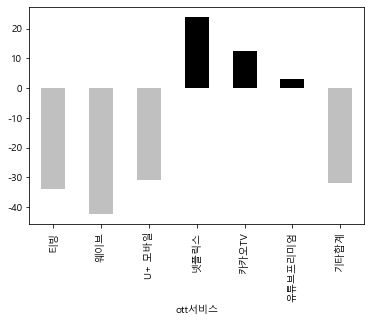

In [24]:
# 20년대비 21년의 증감률 top3 OTT 서비스
colors=["silver","silver","silver","black","black","black","silver"]
df["증감률"][df["구분2"]=="소계"].plot.bar(color=colors)

# 2. OTT 서비스 이용시간(2019~2020)
### ※ 이야기 해야 할 것 
    
#####    1) 컬럼으로는 성별, 연령, 월평균소득, 지역, 가구원수 사용 

In [25]:
best_ott=pd.read_csv("data/OTT서비스_이용시간.csv", header=[0,1], index_col=[0,1])

In [26]:
## 컬럼 정리

best_ott.columns =[["2019","2019","2019","2019","2019","2019","2019","2020","2020","2020","2020","2020","2020","2020"], 
                   ["사례수","5분 미만","5분 이상 10분 미만","10분 이상 30분 미만","30분 이상 1시간 미만","1시간 이상 2시간 미만","2시간 이상",
                   "사례수","5분 미만","5분 이상 10분 미만","10분 이상 30분 미만","30분 이상 1시간 미만","1시간 이상 2시간 미만","2시간 이상"]]

### 인덱스 이름 수정을 위해 전치 후 다시 복귀

In [27]:
best_ott=best_ott.T

In [28]:
## 필요없는 컬럼 삭제

del (best_ott["학력1","미취학"],best_ott["학력1","초졸이하"],best_ott["학력1","중졸이하"],best_ott["학력1","고졸이하"],
     best_ott["학력1","대졸이하"],best_ott["학력1","대학원재학이상"])
del (best_ott["지역구분2", "시부"],best_ott["지역구분2", "군부"])
del (best_ott["종사상지위","임금근로자"],best_ott["종사상지위","고용주"],best_ott["종사상지위","단독자영업자"],
     best_ott["종사상지위","무급가족종사자"],best_ott["종사상지위","무직"])
del (best_ott["상세직업","관리자"],best_ott["상세직업","전문가및관련종사자"],best_ott["상세직업","사무종사자"],
     best_ott["상세직업","서비스종사자"],best_ott["상세직업","판매종사자"],best_ott["상세직업","농림어업종사자"],
     best_ott["상세직업","기능원및관련기능종사자"],best_ott["상세직업","장치기계조작및조립종사자"],best_ott["상세직업","단순노무종사자"],
     best_ott["상세직업","직업군인"],best_ott["상세직업","학생"],best_ott["상세직업","전업주부"],best_ott["상세직업","군인(직업군인제외)"],
     best_ott["상세직업","기타/무직"])
del (best_ott["주택형태","단독주택"],best_ott["주택형태","아파트"],best_ott["주택형태","연립주택빌라다세대주택"],
     best_ott["주택형태","비거주용건물내의주택"],best_ott["주택형태","기타"])
del (best_ott["가족구성","1인가구"],best_ott["가족구성","1세대가구"],best_ott["가족구성","2세대가구"],
     best_ott["가족구성","3세대가구"],best_ott["가족구성","기타"])
del (best_ott["가구주와의관계","가구주"],best_ott["가구주와의관계","가구주의배우자"],best_ott["가구주와의관계","가구주의자녀"],
     best_ott["가구주와의관계","자녀의배우자"],best_ott["가구주와의관계","손자.녀/그배우자"],best_ott["가구주와의관계","부모(배우자부모포함)"],
     best_ott["가구주와의관계","형제자매/그배우자"],best_ott["가구주와의관계","기타친인척"],best_ott["가구주와의관계","동거인"])

In [29]:
## 컬럼 정리

best_ott.columns=[["전체","성별","성별","연령","연령","연령","연령","연령","연령","연령","연령",
                "월평균소득","월평균소득","월평균소득","월평균소득","월평균소득","월평균소득","월평균소득","월평균소득",
                "지역","지역","지역","지역","지역","지역","지역","지역","지역","지역","지역","지역",
                "지역","지역","지역","지역","지역","가구원수","가구원수","가구원수"],
               ["소계","남","여","만10대미만","만10-19세","만20-29세","만30-39세","만40-49세","만50-59세","만60-69세","만70세이상",
                "소득없음","50만원미만","50-100만원미만","100-200만원미만","200-300만원미만","300-400만원미만","400-500만원미만","500만원이상",
                "서울","부산","대구","인천","광주","대전","울산","경기","강원","충북","충남","전북","전남","경북","경남","제주","세종",
                "1인가구","2인가구","3인이상가구"]]

In [30]:
## 원상복귀
ott_time=best_ott.T
ott_time

2019                                                 \
                      사례수 5분 미만 5분 이상 10분 미만 10분 이상 30분 미만 30분 이상 1시간 미만   
전체    소계           4457.7   1.1          7.3          43.3          25.8   
성별    남            2375.6   0.9          7.0          44.0          24.8   
      여            2082.1   1.4          7.8          42.5          27.0   
연령    만10대미만         80.6   4.5          3.5          42.5          31.4   
      만10-19세       501.5   0.9          4.6          32.8          25.6   
      만20-29세      1022.5   0.5          3.8          34.0          28.3   
      만30-39세       978.7   1.3          7.0          46.5          26.5   
      만40-49세       867.8   1.2          6.1          44.2          29.2   
      만50-59세       683.8   0.7         11.8          53.0          21.7   
      만60-69세       273.7   2.8         17.6          59.6          12.5   
      만70세이상         49.1   3.7         22.7          41.6          25.6   
월평균소득 소득없음         1537.6   1.3          6.6          40.0          26.7   
      50만원미만        105.8   0.0         19.6          25.8          22.0   
      50-100만원미만    136.8   4.0          4.3          45.4          24.3   
      100-200만원미만   800.5   1.6          9.7          45.9          26.5   
      200-300만원미만  1081.3   0.8          7.3          44.8          27.7   
      300-400만원미만   504.8   0.8          6.2          53.4          20.1   
      400-500만원미만   173.2   0.0          4.1          35.6          21.1   
      500만원이상       117.7   0.0          3.4          36.0          29.4   
지역    서울            699.2   0.2          2.6          41.2          24.9   
      부산            393.5   1.2          6.1          56.5          29.2   
      대구            174.1   0.4          3.0          35.7          19.1   
      인천            245.4   0.0          0.4          36.7          27.0   
      광주            109.9   0.0         12.8          45.5          35.9   
      대전            230.3   3.2         20.5          44.3          24.4   
      울산            150.5   0.4          7.9          69.3          11.8   
      경기           1040.9   0.1          2.1          34.5          31.1   
      강원            105.1   2.1         11.8          30.6          18.9   
      충북            249.7   1.4          7.0          59.1          28.8   
      충남            311.6   2.0          9.2          45.7          25.1   
      전북            139.4  14.2         26.2          41.2          16.8   
      전남             45.0   2.7         23.6          33.0          27.4   
      경북            135.2   0.5          8.1          26.9          19.1   
      경남            323.3   0.3         17.0          56.9          19.8   
      제주             58.9   0.0         12.3          19.1          32.0   
      세종             45.6   0.0          9.7          56.8          24.7   
가구원수  1인가구          441.3   2.3         10.8          47.9          27.9   
      2인가구          919.5   1.7         13.3          49.0          22.3   
      3인이상가구       3096.9   0.8          5.0          41.0          26.6   

                                          2020                     \
                  1시간 이상 2시간 미만 2시간 이상     사례수 5분 미만 5분 이상 10분 미만   
전체    소계                   14.8    7.6  7434.0   0.2          2.0   
성별    남                    16.4    7.0  3872.0   0.2          2.1   
      여                    13.0    8.4  3562.0   0.1          2.0   
연령    만10대미만               13.4    4.8   173.0   0.0          0.2   
      만10-19세              24.0   12.1   825.0   0.1          1.1   
      만20-29세              18.2   15.3  1378.0   0.1          0.6   
      만30-39세              13.6    5.0  1420.0   0.1          1.1   
      만40-49세              14.7    4.6  1481.0   0.4          1.6   
      만50-59세               8.7    4.1  1373.0   0.2          3.8   
      만60-69세               6.4    1.2   666.0   0.1          5.4   
      만70세이상                6.4    0.0   119.0   0.0          3.4   
월평균소득 소

### 연령별 사용시간 그래프

In [31]:
ott_time_2019=ott_time["2019"].T[1:]

<AxesSubplot:>

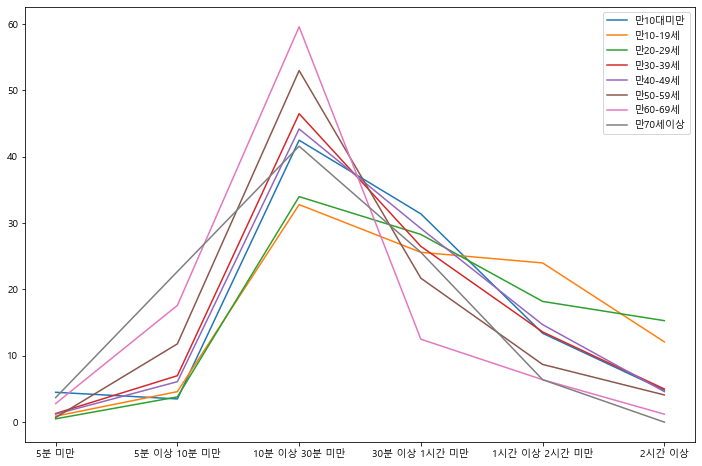

In [32]:
ott_time_2019["연령"].plot(figsize=(12,8))
## 모든 연령대에서 10분이상 30분미만이 가장 많은 것을 볼 수 있다.
## 이동하거나 휴식시간에 OTT서비스를 이용한다고 추축할 수 있다

# 3. OTT 서비스 이용빈도(2019~2021)
### ※ 이야기 해야 할 것 
    
#####    1) 컬럼으로는 성별, 연령, 월평균소득, 지역, 가구원수 사용 

In [33]:
best_ott=pd.read_csv("data/OTT서비스_이용빈도.csv", header=[0,1], index_col=[0,1])

In [34]:
best_ott.columns =[["2019","2019","2019","2019","2019","2019","2019","2019","2019",
                    "2020","2020","2020","2020","2020","2020","2020","2020","2020",
                    "2021","2021","2021","2021","2021","2021","2021","2021","2021"], 
                   ["사례수","하루에도 여러번", "하루1번(매일)","1주일에 5~6회","1주일에 3~4회","1주일에 1~2회","월1~3회","월1회 미만","분기/연간1회",
                   "사례수","하루에도 여러번", "하루1번(매일)","1주일에 5~6회","1주일에 3~4회","1주일에 1~2회","월1~3회","월1회 미만","분기/연간1회",
                   "사례수","하루에도 여러번", "하루1번(매일)","1주일에 5~6회","1주일에 3~4회","1주일에 1~2회","월1~3회","월1회 미만","분기/연간1회"]]

In [35]:
# 전처리를 위해 전치
best_ott=best_ott.T

In [36]:
# 필요없는 컬럼 제거
del (best_ott["학력1","미취학"],best_ott["학력1","초졸이하"],best_ott["학력1","중졸이하"],best_ott["학력1","고졸이하"],
     best_ott["학력1","대졸이하"],best_ott["학력1","대학원재학이상"])
del (best_ott["지역구분2", "시부"],best_ott["지역구분2", "군부"])
del (best_ott["종사상지위","임금근로자"],best_ott["종사상지위","고용주"],best_ott["종사상지위","단독자영업자"],
     best_ott["종사상지위","무급가족종사자"],best_ott["종사상지위","무직"])
del (best_ott["상세직업","관리자"],best_ott["상세직업","전문가및관련종사자"],best_ott["상세직업","사무종사자"],
     best_ott["상세직업","서비스종사자"],best_ott["상세직업","판매종사자"],best_ott["상세직업","농림어업종사자"],
     best_ott["상세직업","기능원및관련기능종사자"],best_ott["상세직업","장치기계조작및조립종사자"],best_ott["상세직업","단순노무종사자"],
     best_ott["상세직업","직업군인"],best_ott["상세직업","학생"],best_ott["상세직업","전업주부"],best_ott["상세직업","군인(직업군인제외)"],
     best_ott["상세직업","기타/무직"])
del (best_ott["주택형태","단독주택"],best_ott["주택형태","아파트"],best_ott["주택형태","연립주택빌라다세대주택"],
     best_ott["주택형태","비거주용건물내의주택"],best_ott["주택형태","기타"])
del (best_ott["가족구성","1인가구"],best_ott["가족구성","1세대가구"],best_ott["가족구성","2세대가구"],
     best_ott["가족구성","3세대가구"],best_ott["가족구성","기타"])
del (best_ott["가구주와의관계","가구주"],best_ott["가구주와의관계","가구주의배우자"],best_ott["가구주와의관계","가구주의자녀"],
     best_ott["가구주와의관계","자녀의배우자"],best_ott["가구주와의관계","손자.녀/그배우자"],best_ott["가구주와의관계","부모(배우자부모포함)"],
     best_ott["가구주와의관계","형제자매/그배우자"],best_ott["가구주와의관계","기타친인척"],best_ott["가구주와의관계","동거인"])

In [37]:
# 컬럼 정리
best_ott.columns=[["전체","성별","성별","연령","연령","연령","연령","연령","연령","연령","연령",
                "월평균소득","월평균소득","월평균소득","월평균소득","월평균소득","월평균소득","월평균소득","월평균소득",
                "지역","지역","지역","지역","지역","지역","지역","지역","지역","지역","지역","지역",
                "지역","지역","지역","지역","지역","가구원수","가구원수","가구원수"],
               ["소계","남","여","만10대미만","만10-19세","만20-29세","만30-39세","만40-49세","만50-59세","만60-69세","만70세이상",
                "소득없음","50만원미만","50-100만원미만","100-200만원미만","200-300만원미만","300-400만원미만","400-500만원미만","500만원이상",
                "서울","부산","대구","인천","광주","대전","울산","경기","강원","충북","충남","전북","전남","경북","경남","제주","세종",
                "1인가구","2인가구","3인이상가구"]]

In [68]:
ott_bin=best_ott.T
ott_bin

2019                                                  \
                      사례수 하루에도 여러번 하루1번(매일) 1주일에 5~6회 1주일에 3~4회 1주일에 1~2회   
전체    소계           4457.7     20.8     13.4       8.5      13.8      28.9   
성별    남            2375.6     21.8     12.8       8.8      14.2      27.8   
      여            2082.1     19.6     14.0       8.1      13.4      30.2   
연령    만10대미만         80.6     22.4     18.5      10.3       5.8      16.0   
      만10-19세       501.5     34.5     12.6      12.3      11.1      19.9   
      만20-29세      1022.5     27.8     13.3       9.4      13.2      30.3   
      만30-39세       978.7     17.5     13.3       9.5      18.7      26.7   
      만40-49세       867.8     14.9     14.4       6.9      14.7      32.9   
      만50-59세       683.8     16.9     12.9       5.7      11.2      32.2   
      만60-69세       273.7     10.0     12.5       6.0      10.4      29.8   
      만70세이상         49.1     12.8      9.6       7.4       9.8      38.5   
월평균소득 소득없음         1537.6     27.5     14.1       8.5      11.6      25.4   
      50만원미만        105.8     27.9     24.8       4.9       3.0      23.2   
      50-100만원미만    136.8     27.7      6.2      21.0       8.7      26.4   
      100-200만원미만   800.5     13.9     11.8       7.1      13.3      33.1   
      200-300만원미만  1081.3     16.0     12.6       9.0      18.4      30.1   
      300-400만원미만   504.8     17.3     15.2       8.6      15.4      31.3   
      400-500만원미만   173.2     22.2     11.1       2.9      14.4      34.1   
      500만원이상       117.7     21.5     14.8       9.7      12.8      26.8   
지역    서울            699.2     22.1     12.2       5.4       9.5      33.6   
      부산            393.5     17.0     12.7      12.1      20.0      25.1   
      대구            174.1     35.3     13.8       3.9       6.7      21.7   
      인천            245.4     18.2      6.5       6.3      15.3      42.3   
      광주            109.9     17.0      6.0      14.8      24.6      25.3   
      대전            230.3     10.7     16.6      18.3      16.6      27.7   
      울산            150.5     11.1     15.5      12.0      22.9      22.6   
      경기           1040.9     25.7     16.3       4.9      12.1      27.6   
      강원            105.1     27.2      7.8       9.2      14.0      29.8   
      충북            249.7     14.1      2.7      18.5      23.0      27.6   
      충남            311.6     18.6     19.0      11.1      13.4      25.6   
      전북            139.4     15.5      0.5       4.5      18.2      33.1   
      전남             45.0     11.2     20.1       0.0      15.6      26.5   
      경북            135.2     53.8      9.5       2.0       5.3      15.3   
      경남            323.3     11.5     20.6      10.1      10.3      32.9   
      제주             58.9     15.8     30.9       3.6       2.6      24.6   
      세종             45.6      7.6      4.3      18.2      16.7      47.3   
가구원수  1인가구          441.3     12.4     14.3       7.5      15.4      36.5   
      2인가구          919.5     16.9     14.2       9.1      14.0      29.8   
      3인이상가구       3096.9     23.1     13.0       8.4      13.5      27.6   

                                          2020  ...            2021           \
                  월1~3회 월1회 미만 분기/연간1회     사례수  ... 분기/연간1회     사례수 하루에도 여러번   
전체    소계           11.2    2.9     0.5  7434.0  ...     0.1  8293.7     36.5   
성별    남            11.2    2.9     0.4  3872.0  ...     0.2  4283.5     36.7   
      여            11.1    3.0     0.6  3562.0  ...     0.0  4010.2     36.2   
연령    만10대미만       22.5    4.5     0.0   173.0  ...     0.0   174.5     33.2   
      만10-19세       6.3    2.0     1.3   825.0  ...     0.2   880.1     50.0   
      만20-29세       4.7    1.1     0.1  1378.0  ...     0.0  1381.4     51.0   
      만30-39세      11.0    3.4     0.0  1420.0  ...     0.5  1390.1     35.4   
      만40-49세      12.5    3.1     0.6  1481.0  ...     0.0  1585.9     33.3   
      만50-59세      16.6    3.4     1.0  1373.0  ...     0.0  15

### 이용빈도의 전체-소계로 그래프 그리기

#### 1) 2019년도

In [69]:
# 사례수 제거
del (ott_bin["2019","사례수"], ott_bin["2020","사례수"], ott_bin["2021","사례수"])

In [62]:
col19=[]
for i in ott_bin["2019"].columns:
    col19.append(i)

x19=list(range(len(col19)))

y19=[]
for i in ott_bin["2019"].loc["전체"].values:
    y19.extend(i)

In [66]:
col21=[]
for i in ott_bin["2021"].columns:
    col21.append(i)

x21=list(range(len(col21)))

y21=[]
for i in ott_bin["2021"].loc["전체"].values:
    y21.extend(i)

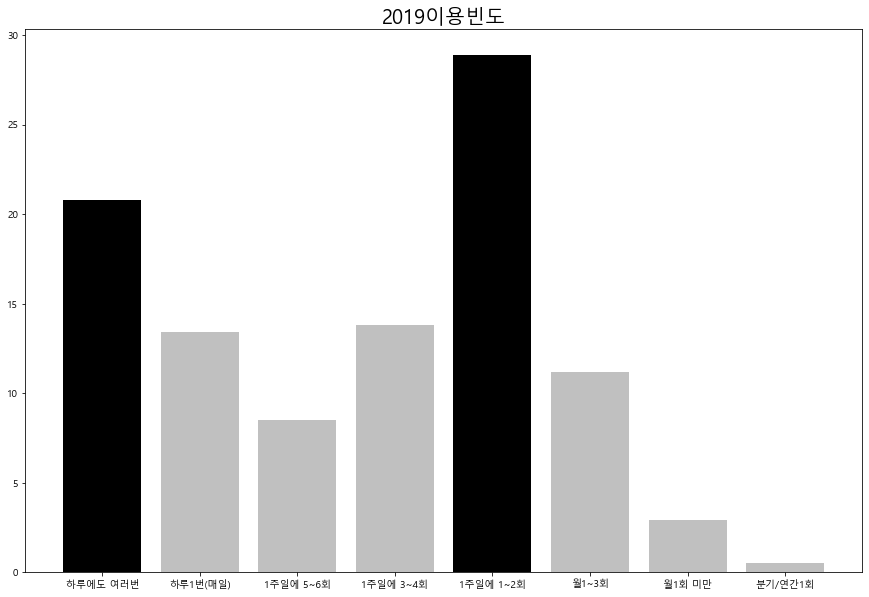

In [76]:
colors=["black","silver","silver","silver","black","silver","silver","silver"]
plt.figure(figsize=(15,10))
plt.xticks(x19,col)
plt.bar(x19,y19,color=colors)

plt.title("2019이용빈도",fontsize=20)
plt.show()

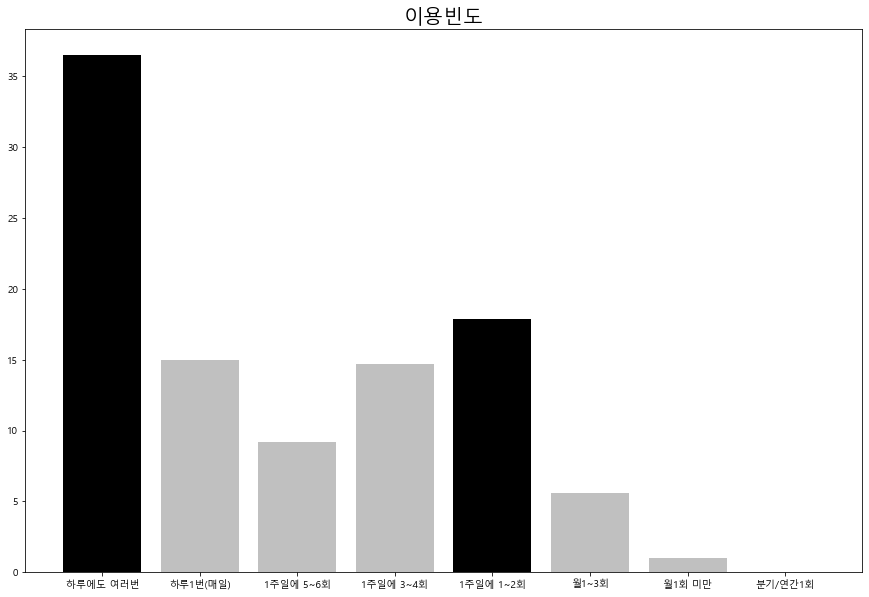

In [77]:
colors=["black","silver","silver","silver","black","silver","silver","silver"]
plt.figure(figsize=(15,10))
plt.xticks(x21,col)
plt.bar(x21,y21,color=colors)

plt.title("이용빈도",fontsize=20)
plt.show()

# 4. OTT 서비스 유료결제(2019~2020)
### ※ 이야기 해야 할 것 
    
#####    1) 컬럼으로는 성별, 연령, 월평균소득, 지역, 가구원수 사용 

In [78]:
best_ott=pd.read_csv("data/OTT서비스_유료결제_이용여부.csv", header=[0,1], index_col=[0,1])

In [79]:
best_ott.columns=[["2019","2019","2019","2020","2020","2020"],
                 ["사례수","있다","없다","사례수","있다","없다"]]

In [80]:
best_ott=best_ott.T

In [81]:
del (best_ott["학력1","미취학"],best_ott["학력1","초졸이하"],best_ott["학력1","중졸이하"],best_ott["학력1","고졸이하"],
     best_ott["학력1","대졸이하"],best_ott["학력1","대학원재학이상"])
del (best_ott["지역구분2", "시부"],best_ott["지역구분2", "군부"])
del (best_ott["종사상지위","임금근로자"],best_ott["종사상지위","고용주"],best_ott["종사상지위","단독자영업자"],
     best_ott["종사상지위","무급가족종사자"],best_ott["종사상지위","무직"])
del (best_ott["상세직업","관리자"],best_ott["상세직업","전문가및관련종사자"],best_ott["상세직업","사무종사자"],
     best_ott["상세직업","서비스종사자"],best_ott["상세직업","판매종사자"],best_ott["상세직업","농림어업종사자"],
     best_ott["상세직업","기능원및관련기능종사자"],best_ott["상세직업","장치기계조작및조립종사자"],best_ott["상세직업","단순노무종사자"],
     best_ott["상세직업","직업군인"],best_ott["상세직업","학생"],best_ott["상세직업","전업주부"],best_ott["상세직업","군인(직업군인제외)"],
     best_ott["상세직업","기타/무직"])
del (best_ott["주택형태","단독주택"],best_ott["주택형태","아파트"],best_ott["주택형태","연립주택빌라다세대주택"],
     best_ott["주택형태","비거주용건물내의주택"],best_ott["주택형태","기타"])
del (best_ott["가족구성","1인가구"],best_ott["가족구성","1세대가구"],best_ott["가족구성","2세대가구"],
     best_ott["가족구성","3세대가구"],best_ott["가족구성","기타"])
del (best_ott["가구주와의관계","가구주"],best_ott["가구주와의관계","가구주의배우자"],best_ott["가구주와의관계","가구주의자녀"],
     best_ott["가구주와의관계","자녀의배우자"],best_ott["가구주와의관계","손자.녀/그배우자"],best_ott["가구주와의관계","부모(배우자부모포함)"],
     best_ott["가구주와의관계","형제자매/그배우자"],best_ott["가구주와의관계","기타친인척"],best_ott["가구주와의관계","동거인"])

In [82]:
best_ott.columns=[["전체","성별","성별","연령","연령","연령","연령","연령","연령","연령","연령",
                "월평균소득","월평균소득","월평균소득","월평균소득","월평균소득","월평균소득","월평균소득","월평균소득",
                "지역","지역","지역","지역","지역","지역","지역","지역","지역","지역","지역","지역",
                "지역","지역","지역","지역","지역","가구원수","가구원수","가구원수"],
               ["소계","남","여","만10대미만","만10-19세","만20-29세","만30-39세","만40-49세","만50-59세","만60-69세","만70세이상",
                "소득없음","50만원미만","50-100만원미만","100-200만원미만","200-300만원미만","300-400만원미만","400-500만원미만","500만원이상",
                "서울","부산","대구","인천","광주","대전","울산","경기","강원","충북","충남","전북","전남","경북","경남","제주","세종",
                "1인가구","2인가구","3인이상가구"]]

In [83]:
ott_have=best_ott.T
ott_have

2019                2020            
                      사례수    있다    없다     사례수    있다    없다
전체    소계           4457.7  10.4  89.6  7434.0  14.4  85.6
성별    남            2375.6   9.5  90.5  3872.0  14.2  85.8
      여            2082.1  11.6  88.4  3562.0  14.5  85.5
연령    만10대미만         80.6   1.2  98.8   173.0   0.5  99.5
      만10-19세       501.5   5.1  94.9   825.0   5.4  94.6
      만20-29세      1022.5  18.7  81.3  1378.0  25.4  74.6
      만30-39세       978.7  11.8  88.2  1420.0  25.2  74.8
      만40-49세       867.8   7.9  92.1  1481.0  15.1  84.9
      만50-59세       683.8   7.2  92.8  1373.0   5.5  94.5
      만60-69세       273.7   5.0  95.0   666.0   2.2  97.8
      만70세이상         49.1   3.8  96.2   119.0   1.4  98.6
월평균소득 소득없음         1537.6   7.4  92.6  2477.0   9.0  91.0
      50만원미만        105.8  24.3  75.7   138.0  20.7  79.3
      50-100만원미만    136.8  14.5  85.5   222.0   9.6  90.4
      100-200만원미만   800.5   8.0  92.0  1120.0   9.1  90.9
      200-300만원미만  1081.3  13.8  86.2  1961.0  20.3  79.7
      300-400만원미만   504.8  13.7  86.3  1026.0  21.6  78.4
      400-500만원미만   173.2   7.9  92.1   266.0  18.2  81.8
      500만원이상       117.7   9.2  90.8   224.0  10.8  89.2
지역    서울            699.2  14.9  85.1  1482.0  21.0  79.0
      부산            393.5   3.5  96.5   524.0   6.8  93.2
      대구            174.1  11.8  88.2   335.0  22.4  77.6
      인천            245.4  10.3  89.7   452.0  15.1  84.9
      광주            109.9   7.9  92.1   248.0  14.9  85.1
      대전            230.3   6.0  94.0   213.0   4.0  96.0
      울산            150.5  10.1  89.9   176.0  18.5  81.5
      경기           1040.9  16.7  83.3  1907.0  14.3  85.7
      강원            105.1  10.0  90.0   181.0  16.3  83.7
      충북            249.7   1.1  98.9   264.0   8.1  91.9
      충남            311.6   2.5  97.5   265.0   6.4  93.6
      전북            139.4   4.1  95.9   262.0  14.6  85.4
      전남             45.0  16.6  83.4   245.0   8.7  91.3
      경북            135.2  15.4  84.6   291.0  15.7  84.3
      경남            323.3  10.3  89.7   427.0   5.5  94.5
      제주             58.9   3.5  96.5    83.0  22.2  77.8
      세종             45.6   1.0  99.0    79.0  14.7  85.3
가구원수  1인가구          441.3  14.2  85.8   822.0  26.8  73.2
      2인가구          919.5   9.5  90.5  1586.0  14.2  85.8
      3인이상가구       3096.9  10.2  89.8  5027.0  12.4  87.6

# 5. OTT 서비스 지출금액(2020)
### ※ 이야기 해야 할 것 
    
#####    1) 컬럼으로는 성별, 연령, 월평균소득, 지역, 가구원수 사용 

In [84]:
best_ott = pd.read_csv("data/OTT서비스_월평균_지출_금액.csv",header=[0,1], index_col=[0,1])

In [85]:
best_ott.columns=[["2020","2020","2020","2020","2020","2020","2020","2020","2020"],
                 ["사례수","5천원 미만","5천-1만원 미만","1만-1.5만원 미만","1.5만-2만원미만","2만-2.5만원 미만",
                  "2.5만-3만원 미만","3만-3.5만원 미만","3.5만원 이상"]]

In [86]:
best_ott=best_ott.T

In [87]:
## 필요없는 컬럼 삭제

del (best_ott["학력1","초졸이하"],best_ott["학력1","중졸이하"],best_ott["학력1","고졸이하"],
     best_ott["학력1","대졸이하"],best_ott["학력1","대학원재학이상"])
del (best_ott["지역구분2", "시부"],best_ott["지역구분2", "군부"])
del (best_ott["종사상지위","임금근로자"],best_ott["종사상지위","고용주"],best_ott["종사상지위","단독자영업자"],
     best_ott["종사상지위","무급가족종사자"],best_ott["종사상지위","무직"])
del (best_ott["상세직업","관리자"],best_ott["상세직업","전문가및관련종사자"],best_ott["상세직업","사무종사자"],
     best_ott["상세직업","서비스종사자"],best_ott["상세직업","판매종사자"],best_ott["상세직업","농림어업종사자"],
     best_ott["상세직업","기능원및관련기능종사자"],best_ott["상세직업","장치기계조작및조립종사자"],best_ott["상세직업","단순노무종사자"],
     best_ott["상세직업","학생"],best_ott["상세직업","전업주부"],best_ott["상세직업","기타/무직"])
del (best_ott["주택형태","단독주택"],best_ott["주택형태","아파트"],best_ott["주택형태","연립주택빌라다세대주택"],
     best_ott["주택형태","비거주용건물내의주택"],best_ott["주택형태","기타"])
del (best_ott["가족구성","1인가구"],best_ott["가족구성","1세대가구"],best_ott["가족구성","2세대가구"],
     best_ott["가족구성","3세대가구"],best_ott["가족구성","기타"])
del (best_ott["가구주와의관계","가구주"],best_ott["가구주와의관계","가구주의배우자"],best_ott["가구주와의관계","가구주의자녀"],
     best_ott["가구주와의관계","자녀의배우자"],best_ott["가구주와의관계","손자.녀/그배우자"],best_ott["가구주와의관계","형제자매/그배우자"])

In [88]:
## 컬럼 정리

best_ott.columns=[["전체","성별","성별","연령","연령","연령","연령","연령","연령","연령","연령",
                "월평균소득","월평균소득","월평균소득","월평균소득","월평균소득","월평균소득","월평균소득","월평균소득",
                "지역","지역","지역","지역","지역","지역","지역","지역","지역","지역","지역","지역",
                "지역","지역","지역","지역","지역","가구원수","가구원수","가구원수"],
               ["소계","남","여","만10대미만","만10-19세","만20-29세","만30-39세","만40-49세","만50-59세","만60-69세","만70세이상",
                "소득없음","50만원미만","50-100만원미만","100-200만원미만","200-300만원미만","300-400만원미만","400-500만원미만","500만원이상",
                "서울","부산","대구","인천","광주","대전","울산","경기","강원","충북","충남","전북","전남","경북","경남","제주","세종",
                "1인가구","2인가구","3인이상가구"]]

In [89]:
## 원상복귀
ott_price=best_ott.T
ott_price

2020                                                      \
                      사례수 5천원 미만 5천-1만원 미만 1만-1.5만원 미만 1.5만-2만원미만 2만-2.5만원 미만   
전체    소계           1068.0    5.9      29.3        39.5       14.6         6.5   
성별    남             551.0    5.8      27.3        41.0       14.5         6.1   
      여             517.0    5.9      31.4        38.0       14.7         7.0   
연령    만10대미만          1.0    0.0       0.0       100.0        0.0         0.0   
      만10-19세        45.0    8.6      18.8        52.8       11.9         4.1   
      만20-29세       349.0    8.5      28.6        32.3       16.6         8.6   
      만30-39세       357.0    5.8      31.2        39.6       14.8         4.0   
      만40-49세       223.0    2.3      28.6        47.3       10.6         9.0   
      만50-59세        76.0    3.9      37.7        35.4       15.6         4.4   
      만60-69세        15.0    0.0       3.9        63.2       28.1         0.0   
      만70세이상          2.0    0.0       0.0        81.3        0.0        18.7   
월평균소득 소득없음          223.0    7.7      22.3        44.8       13.1         5.4   
      50만원미만         29.0   35.1      46.0        14.7        2.3         1.8   
      50-100만원미만     21.0    2.0      50.1        26.0       12.0         9.8   
      100-200만원미만   102.0    2.4      28.1        37.6       15.0        15.6   
      200-300만원미만   398.0    5.2      34.2        41.0       13.5         2.9   
      300-400만원미만   222.0    4.0      26.1        33.8       20.5        10.3   
      400-500만원미만    48.0    5.5      19.7        45.9       16.9         4.1   
      500만원이상        24.0    0.0      28.3        55.3        4.1        12.2   
지역    서울            311.0    3.1      22.2        49.1       16.0         6.4   
      부산             35.0   36.7      46.4        16.9        0.0         0.0   
      대구             75.0    2.1      24.9        47.0       15.6         4.1   
      인천             68.0    3.1      39.4        32.5        9.2         4.0   
      광주             37.0    0.0      43.0        12.3       34.2        10.5   
      대전              9.0    2.5      35.8        51.6        6.4         3.6   
      울산             33.0    0.5      10.0        36.1        7.9        44.5   
      경기            272.0    2.8      35.3        45.3        9.7         4.7   
      강원             29.0    6.4      14.9        21.4       22.1         3.8   
      충북             21.0    0.0      73.7        14.7       11.5         0.0   
      충남             17.0    1.3      21.3        36.5       41.0         0.0   
      전북             38.0    4.1      47.8        14.6       21.4         0.0   
      전남             21.0    0.0      17.9        16.1       59.5         6.5   
      경북             46.0   41.0       6.0        32.4       18.4         1.7   
      경남             23.0   10.9      60.0        26.0        3.1         0.0   
      제주             19.0   15.8       1.9        60.7        1.7        17.7   
      세종             12.0    1.9       2.6        42.4        0.0        53.1   
가구원수  1인가구          220.0    0.0      41.1        43.0       10.7         3.2   
      2인가구          225.0    7.5      24.8        28.1       19.6        14.8   
      3인이상가구        623.0    7.3      26.8        42.4       14.2         4.8   

                                                    
                  2.5만-3만원 미만 3만-3.5만원 미만 3.5만원 이상  
전체    소계                  1.2         1.4      1.5  
성별    남                   1.7         2.3      1.3  
      여                   0.8         0.4      1.7  
연령    만10대미만              0.0         0.0      0.0  
      만10-19세             1.4         0.4      2.1  
      만20-29세             1.8         2.0      1.5  
      만30-39세             0.7         1.7      2.0  
      만40-49세             1.3         0.5      0.3  
      만50-59세             0.0         0.4      2.6  
      만60-69세             4.8         0.0      0.0  
      만70세이상              0.0         0.0      0.0  
월평균소득 소득없음

In [91]:
ott_price_2020=ott_price["2020"].T[1:]

<AxesSubplot:>

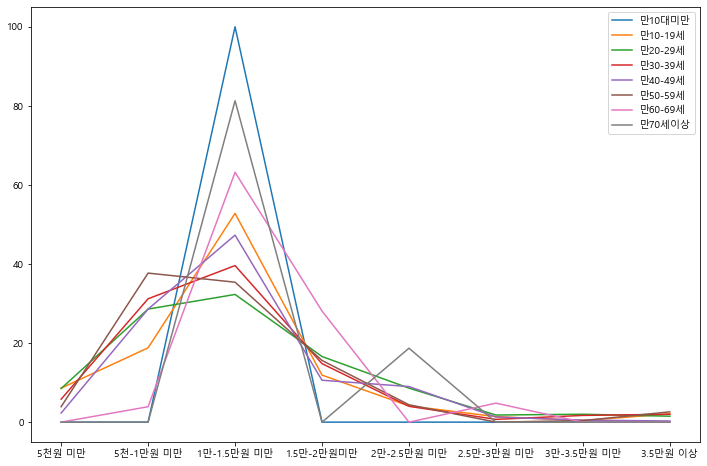

In [92]:
ott_price_2020["연령"].plot(figsize=(12,8))

<AxesSubplot:>

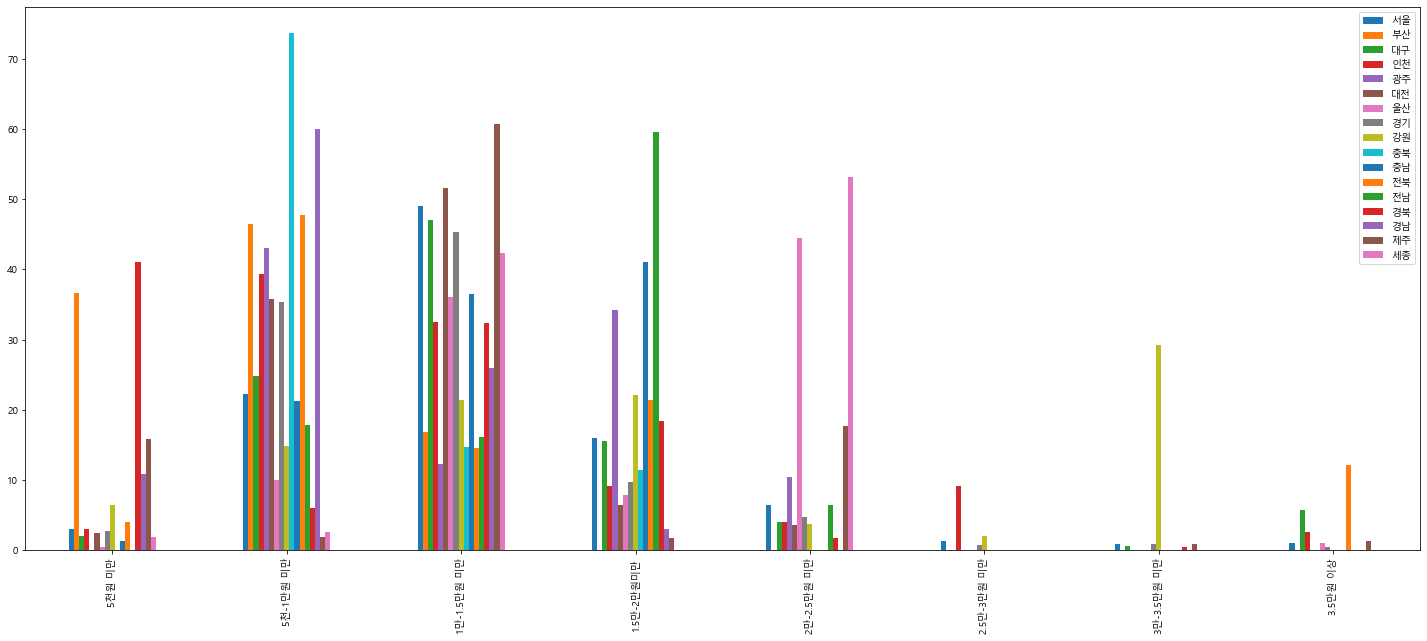

In [101]:
ott_price_2020["지역"].plot(figsize=(25,10), kind="bar")